<a href="https://colab.research.google.com/github/shubhamjangid510/EDA-Capstone-Airbnb-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings.

In [124]:
#importing all the essential packages and sub-packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from scipy.stats import norm
# from sklearn.preprocessing import StandardScaler
# from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [126]:
#Mounting the drive where CSV file is stored.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's read our CSV file first.

In [127]:
#Reading csv file and casting it into a DataFrame.
#Parsing 'last_review' column in order to convert it into the Datetime Format
file_path="/content/drive/MyDrive/EDA Capstone Project/Airbnb NYC 2019.csv"
df=pd.read_csv(file_path,parse_dates= ["last_review"])

In [128]:
#Checking the dimensionality of the DataFrame
df.shape

(48895, 16)

###INFERENCE
From the shape method we can see that we have 48895 rows along with 16 columns.

In [130]:
#Displaying first 5 rows.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [131]:
#Displaying last 5 rows.
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaT,NaN,1,23


In [132]:
#Getting information of the respective columns and their associated datatypes
#along with count of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

###INFERENCE
Here from df.info() method we can see that there are total 10 numeric and 1 datetime format column out of total 16 columns as well as 4 columns have several non-null values which needs to be filled.

In [133]:
#Displaying all the data related to the numeric columns.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [134]:
#Filling the null-values with their respective data types.
#For Object type filling with '-'(hyphen).

df['name'].fillna("-",inplace=True)
df['host_name'].fillna("-",inplace=True)
df['last_review'].fillna("-",inplace=True)

#For Numeric type filling with 0.
df['reviews_per_month'].fillna(0,inplace=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

###INFERENCE
Now we can see that all the columns have 0 null values as all the rows have same non-null values.

In [136]:
#Checking the working of fillna() method.
df.reviews_per_month.isnull().sum()

0

#Analysis - 1 ➡ Neighbourhoods
As seen from the dataset, all the listings are divided into five major neighbourhood areas namely:-
1. Bronx
2. Brooklyn
3. Manhattan
4. Queens
5. Staten Island

In [137]:
#Setting the size of plots.
plt.rcParams['figure.figsize']=(8,8)

In [138]:
#Extracting the count of listings in different neighbourhoods.
neighbourhoods_df = df.loc[df['name'] != '-']
neighbourhoods=neighbourhoods_df['neighbourhood_group'].value_counts()
neighbourhoods_counts=neighbourhoods.values
neighbourhoods_counts


array([21652, 20098,  5666,  1090,   373])

Text(0.5, 0, '')

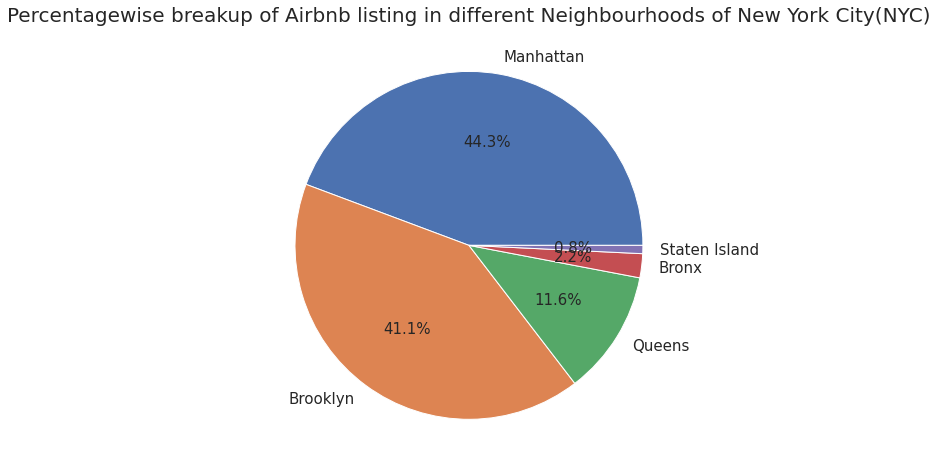

In [139]:
#Plotting a pie chart to show percentagewise distribution of listings.
neighbourhoods.plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title("Percentagewise breakup of Airbnb listing in different Neighbourhoods of New York City(NYC)",fontsize=20)
plt.ylabel("")
plt.xlabel("")

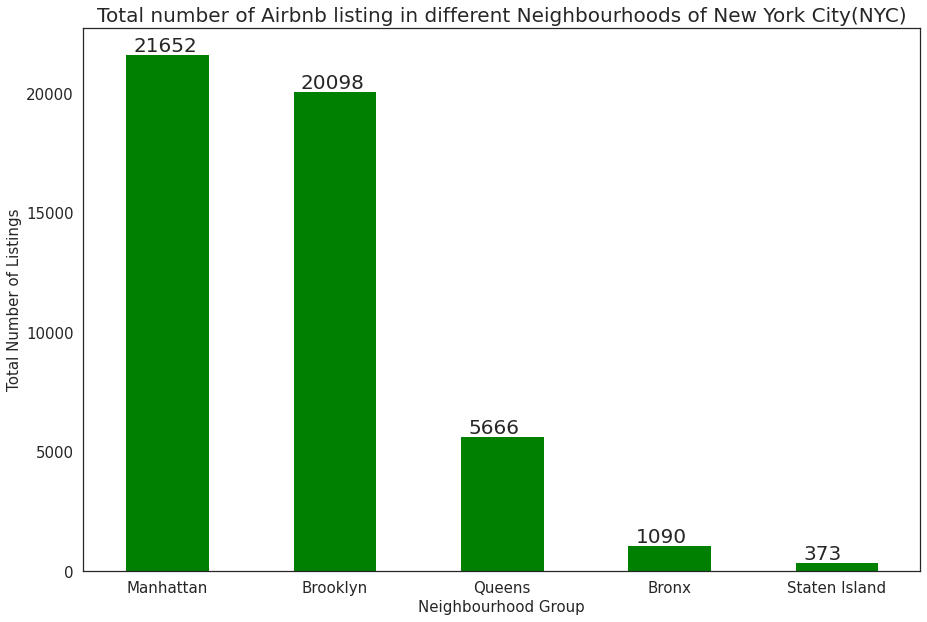

In [142]:
plt.rcParams['figure.figsize']=(15,10)
neighbourhoods.plot(kind='bar',color='green')
plt.title("Total number of Airbnb listing in different Neighbourhoods of New York City(NYC)",fontsize=20)
plt.xlabel("Neighbourhood Group",fontsize=15)
plt.xticks(fontsize = 15,rotation=0)
plt.ylabel("Total Number of Listings",fontsize=15)
plt.yticks(fontsize = 15,rotation=0)
for index,data in enumerate(neighbourhoods_counts):
    plt.text(x=index-0.2 , y=data+100 , s=f"{data}" , fontdict=dict(fontsize=20))


###INFERENCE
From the above pie chart we can conclude that Manhattan has highest listings among the five that is around 44% of the total listings in NYC and this 44% equals to total 21652 listings in Manhattan as evident from the bar graph.
After Manhattan, Brooklyn has the most listings and Staten Island has the least number of listings. 

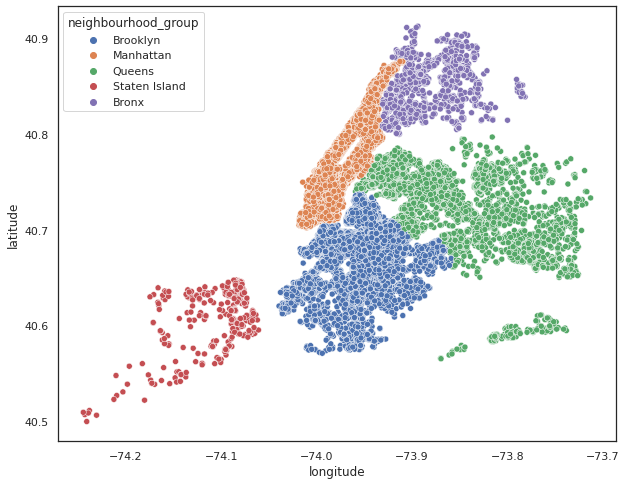

In [84]:
#plotting the neighbourhood_group in maps
plt.figure(figsize=(10,8))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

###INFERENCE
As we can see Manhattan has the smallest area then also it has the highest number of listings.

#Analysis - 2 ➡ Room Types 
We will be finding out different room types available in all the listings.

In [86]:
room_type_count=df.room_type.value_counts()
room_type_count

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(1.7999999999999998, 1373, '1160')

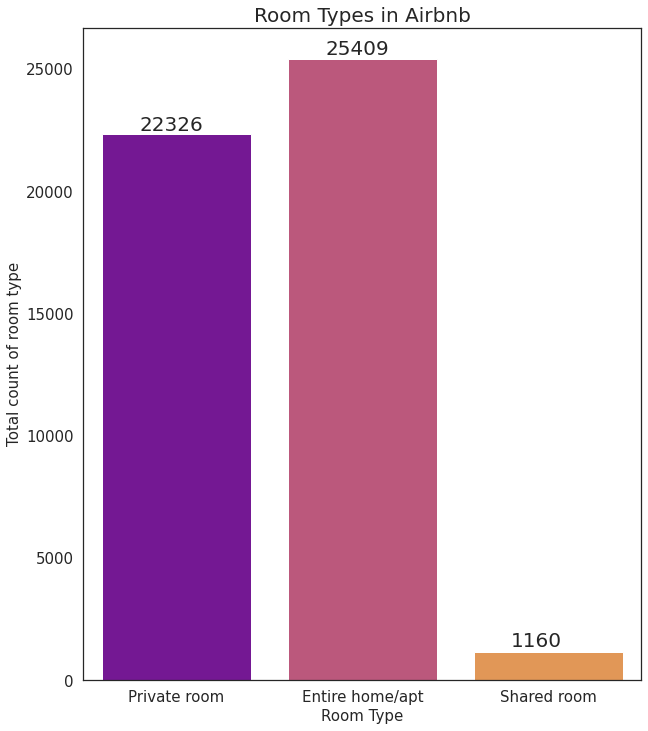

In [88]:
#plotting the graph
sns.countplot(df['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,12)
plt.title('Room Types in Airbnb',fontsize=20)
plt.xlabel("Room Type",fontsize=15)
plt.xticks(fontsize = 15,rotation=0)
plt.ylabel("Total count of room type",fontsize=15)
plt.yticks(fontsize = 15,rotation=0)
plt.text(x=index-4.2 ,y =data+22100,  s=f"{room_type_count[1]}" , fontdict=dict(fontsize=20))
plt.text(x=index-3.2 ,y =data+25200,  s=f"{room_type_count[0]}" , fontdict=dict(fontsize=20))
plt.text(x=index-2.2 ,y =data+1000,    s=f"{room_type_count[2]}" , fontdict=dict(fontsize=20))

###INFERENCE
So basically we have 3 types of room in Airbnb listings. Out of these 3, Entire home/apartment type is the highest that is in more than 25000 listings room type is Entire home/apartment. After that Private rooms are on the second number. Shared room types are present in least Airbnb listings.

#Analysis - 3 ➡ Room types in different neighbourhoods

In [89]:
room_neighbourhood=df.groupby(['room_type','neighbourhood_group'])['room_type'].count().unstack()
room_neighbourhood


neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,379,9559,13199,2096,176
Private room,652,10132,7982,3372,188
Shared room,60,413,480,198,9


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

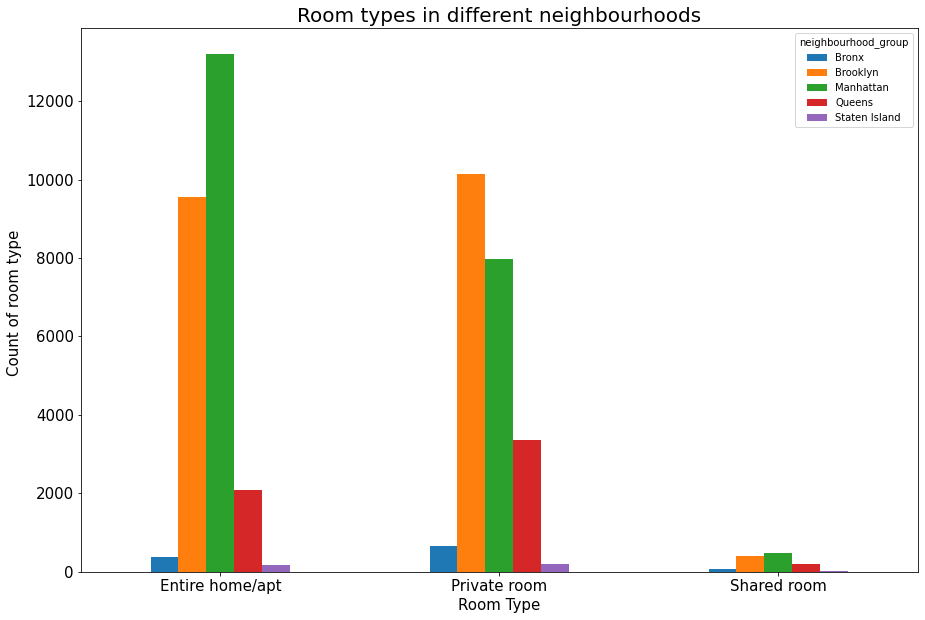

In [37]:
#plotting the graph
plt.rcParams['figure.figsize']=(15,10)
room_neighbourhood.plot(kind='bar')
plt.title("Room types in different neighbourhoods",fontsize=20)
plt.xlabel("Room Type",fontsize=15)
plt.xticks(fontsize = 15,rotation=0)
plt.ylabel("Count of room type ",fontsize=15)
plt.yticks(fontsize = 15,rotation=0)

###INFERENCE
In Manhattan area Entire home/apartment type is highest and Brooklyn has most after Manhattan. 
Interesting thing to notice is that in spite of more number of Entire home/apartment type Brooklyn has more number of Private rooms as compared to Entire home/apartment. 
With respect to Shared room Manhattan and Brooklyn has more numbers as compared to other areas, Staten Island having only 9 shared room properties.

#Analysis - 4 ➡ Neighbourhoods with respect to average price per night
We will be looking into different neighbourhood based on their average price per night.

In [143]:
#Grouping Neighbourhood groups with price to get average price per night.
neighbourhood_average_price=df.groupby(['neighbourhood_group'])['price'].agg('mean')


In [144]:
#getting the values of groupby function and converting them into float values to label them on the graph.
price_value_labels=list(neighbourhood_average_price.values)
for i,value in enumerate(price_value_labels):
  price_value_labels[i]=round(float(value),2)


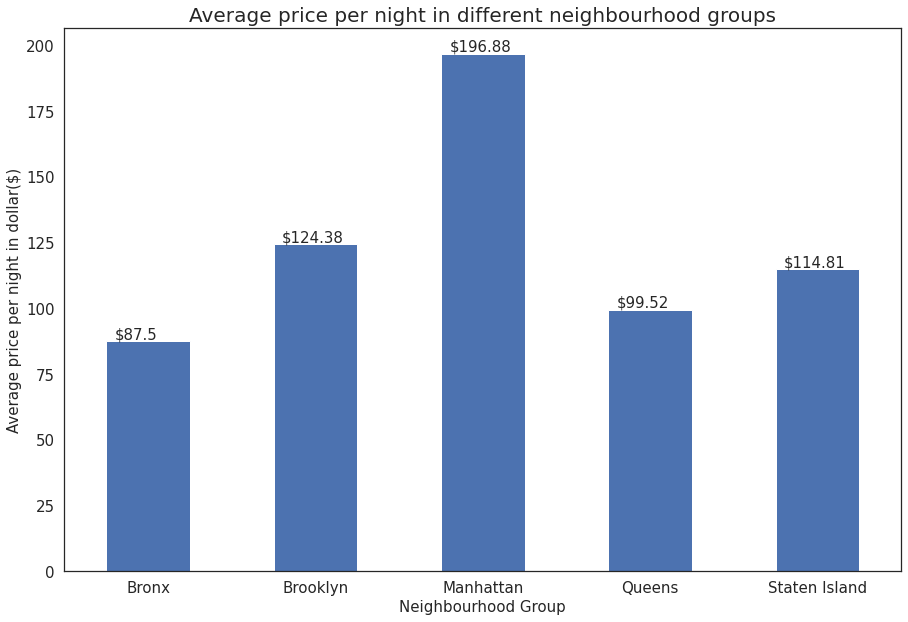

In [147]:
#plotting the graph
plt.rcParams['figure.figsize']=(15,10)
neighbourhood_average_price.plot(kind='bar')
plt.title("Average price per night in different neighbourhood groups",fontsize=20)
plt.xlabel("Neighbourhood Group",fontsize=15)
plt.xticks(fontsize = 15,rotation=0)
plt.ylabel("Average price per night in dollar($)",fontsize=15)
plt.yticks(fontsize = 15)
for index,values in enumerate(price_value_labels):
    plt.text(x=index-0.2 , y =values+1 , s=f"${values}" , fontdict=dict(fontsize=15))

###INFERENCE
Manhattan has the highest average price per night that is around $196 per night. Although the number of listings in Manhattan are highest then also average price per night is also highest in Manhattan among other neighbourhood groups.
So, we can conclude here that Manhattan and Brooklyn are the top neighbourhood groups among the five.

#Analysis - 5 ➡ Comparison of Airbnb room types and average price in different neighbourhoods.

In [93]:
#Grouping Airbnb room types in different neighbourhood to get average price for each Airbnb room type.
room_price_neighbourhood=df.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack()

In [94]:
#Checking if groupby gave desired results or not.
room_price_neighbourhood

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591
Private room,66.788344,76.500099,116.776622,71.762456,62.292553
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444


(array([ 25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250., 275.]),
 <a list of 11 Text major ticklabel objects>)

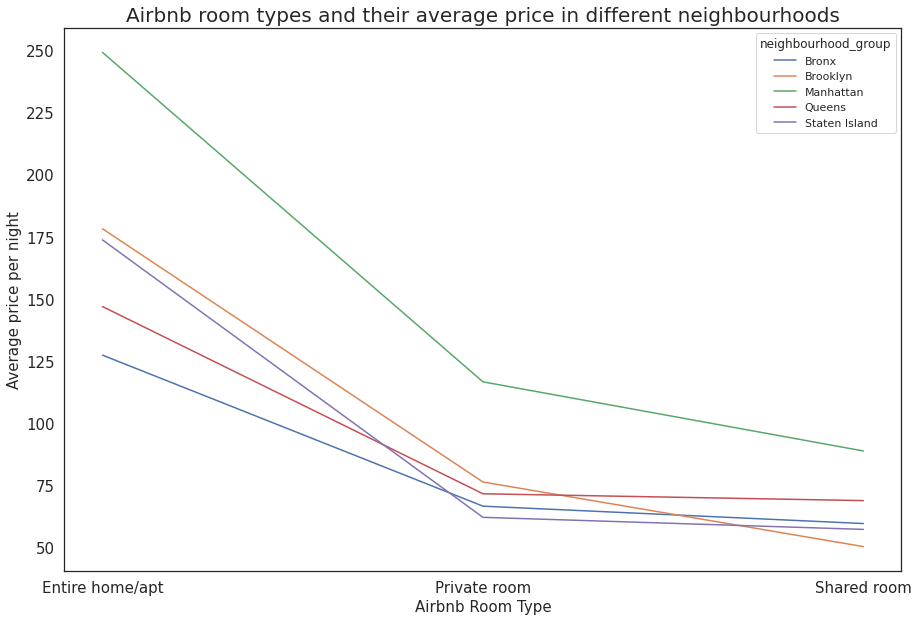

In [172]:
#plotting the graph.
sns.set_style('white')
plt.rcParams['figure.figsize']=(15,10)
room_price_neighbourhood.plot()
plt.title("Airbnb room types and their average price in different neighbourhoods",fontsize=20)
plt.xlabel("Airbnb Room Type",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Average price per night",fontsize=15)
plt.yticks(fontsize = 15)

###**INFERENCE**
Here we can see from the above graph that the average price of Entire home or apartment is highest among the three types that is close to $250 per night in Manhattan Neighbourhood area. Although number of properties/listings in Manhattan area are also the highest then also prices are not that competitive or lesser. 
Brooklyn has the second highest average price per night in Entire home/apartment category as well as it also has the lowest average price per night in shared room category.


#Analysis - 6 ➡ Finding out the top most hosts with highest listings.

In [150]:
top_hosts=df.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [165]:
#setting figure size for seaborn visualization.
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('darkgrid')

In [153]:
#Creating a DataFrame  in order to plot it on the graph.
top_host_df=pd.DataFrame(top_hosts)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Listing_Count'}, inplace=True)
top_host_df

,Host_ID,Listing_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

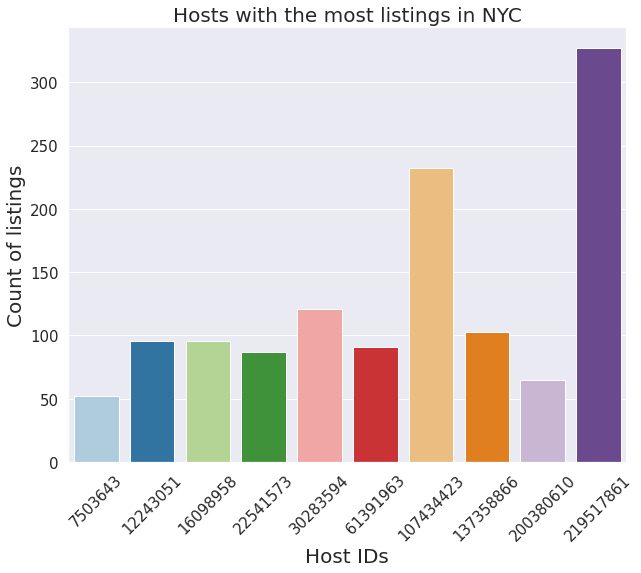

In [166]:
#plotting the graph
s1=sns.barplot(x="Host_ID", y="Listing_Count", data=top_host_df,
                 palette='Paired')
s1.set_title('Hosts with the most listings in NYC',fontsize=20)
s1.set_ylabel('Count of listings',fontsize=20)
s1.set_xlabel('Host IDs',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
s1.set_xticklabels(s1.get_xticklabels(), rotation=45)

###INFERENCE
Here we can see hosts with most number of listings on Airbnb platform. 
So we get to know that a single host can have multiple properties listed on Airbnb. 
As evident from the graph we can see there is a host with more than 300 listings(Hhost_id:-219517861).

#Analysis - 7 ➡ Variation of Monthly Reviews with respect to room types in different neighbourhood areas.

In [167]:
review_room_neighbourhood=df.groupby(['room_type','neighbourhood_group'])['reviews_per_month'].sum().unstack()

In [168]:
review_room_neighbourhood

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,691.58,10757.13,11378.43,3427.04,311.16
Private room,860.23,10037.27,9141.42,5220.53,270.17
Shared room,58.13,310.58,638.23,231.48,6.66


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 8 Text major ticklabel objects>)

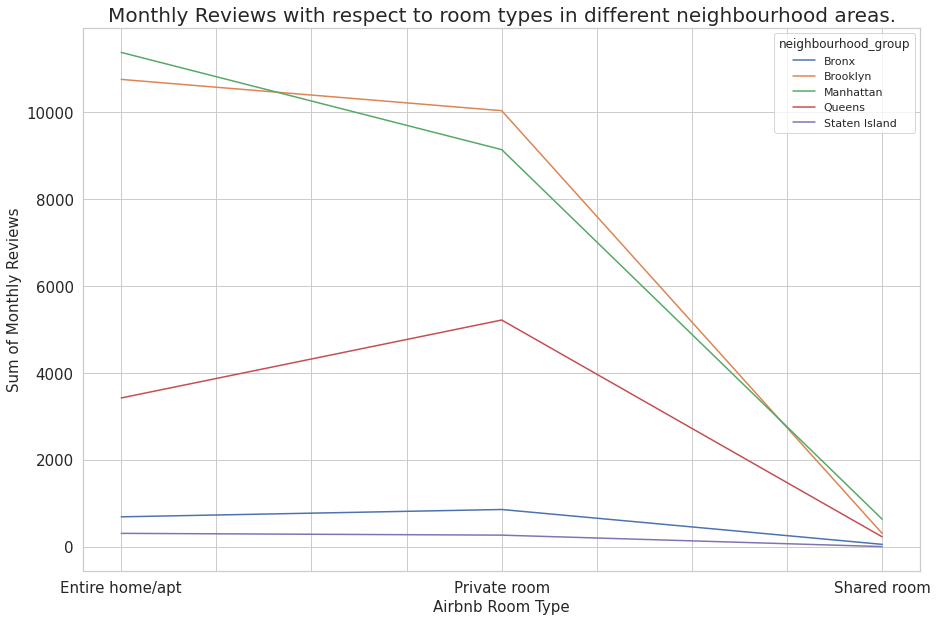

In [174]:
#plotting the graph
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('whitegrid')
review_room_neighbourhood.plot()
plt.title("Monthly Reviews with respect to room types in different neighbourhood areas.",fontsize=20)
plt.xlabel("Airbnb Room Type",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Sum of Monthly Reviews",fontsize=15)
plt.yticks(fontsize = 15)

###**INFERENCE** 
Here we can observe that Entire home or aparment type is the most favourite room type as there are more than 10000 monthly reviews. And here also Manhattan and Brooklyn neighbourhoods are competing as the sum of monthly reviews of both the neighbourhoods are somewhat similar. The least favourite room type is the shared room and that too on Staten Island neighbourhood.











#Analysis - 8 ➡ Comparison of room types and average minimum nights people stayed as well comparing this with different neighbourhoods. 

In [176]:
#Average of minimum nights people stayed in different room types.
night_room_type=df.groupby(['room_type'])['minimum_nights'].mean()

In [177]:
night_room_type

room_type
Entire home/apt    8.506907
Private room       5.377900
Shared room        6.475000
Name: minimum_nights, dtype: float64

In [178]:
#getting the values of groupby function and converting them into float values to label them on the graph.
night_value_labels=list(night_room_type.values)
for i,value in enumerate(night_value_labels):
  night_value_labels[i]=round(float(value),2)

night_value_labels

[8.51, 5.38, 6.47]

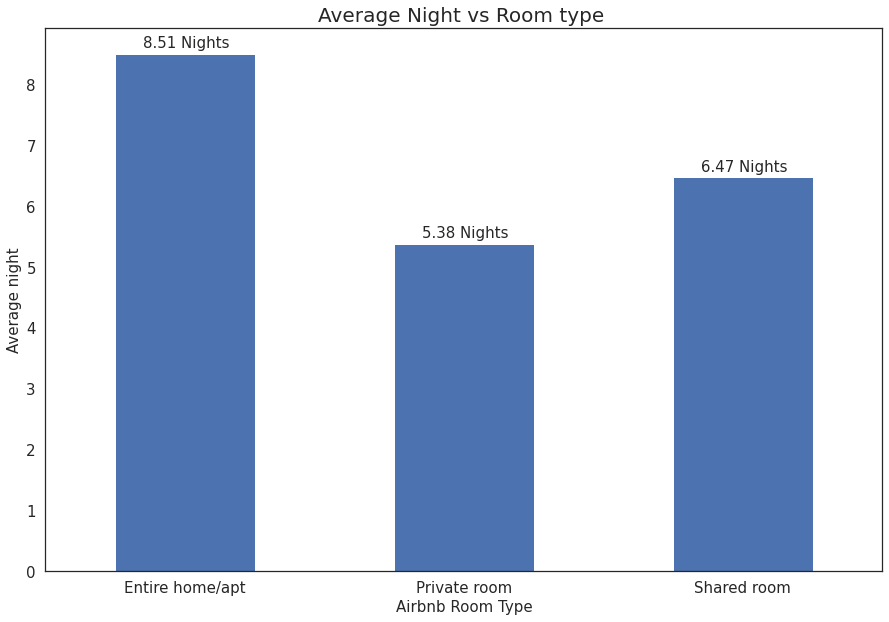

In [184]:
#plotting the graph
plt.rcParams['figure.figsize']=(15,10)
sns.set_style('white')
night_room_type.plot(kind='bar')
plt.title("Average Night vs Room type ",fontsize=20)
plt.xlabel("Airbnb Room Type",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Average night",fontsize=15)
plt.xticks(rotation=360)
plt.yticks(fontsize = 15)
for index,data in enumerate(night_value_labels):
    plt.text(x=index-0.15 , y =data+0.1 , s=f"{data} Nights" , fontdict=dict(fontsize=15))

###INFERENCE
Here we can see that average nights stayed by people is highest in Entire home or apartment type which is 8.51 nights that is 8 nights. Interesting thing to notice is that shared room type comes second in terms of average nights stay as compared to private room.

In [185]:
#comparing aaverage nights in different room types with different neighbourhood areas.
night_room_neighburhood=df.groupby(['room_type','neighbourhood_group'])['minimum_nights'].mean().unstack()

In [186]:
night_room_neighburhood

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,5.957784,6.531332,10.539283,5.369752,6.238636
Private room,3.858896,5.539479,5.446880,5.120107,3.632979
Shared room,3.366667,7.753027,6.766667,4.232323,2.333333


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

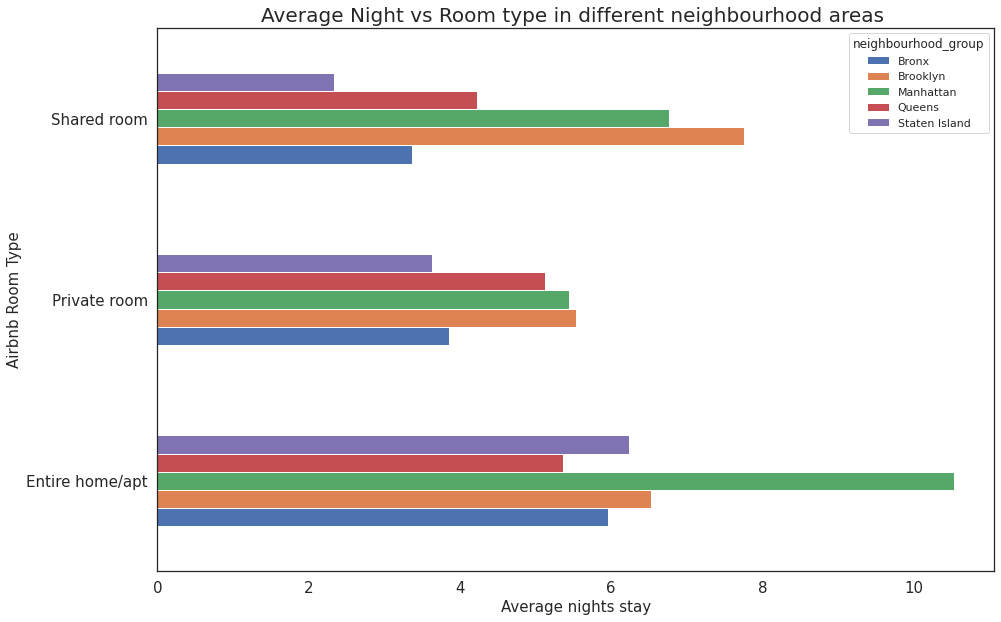

In [187]:
#plotting the graph
plt.rcParams['figure.figsize']=(15,10)
night_room_neighburhood.plot(kind='barh')
plt.title("Average Night vs Room type in different neighbourhood areas ",fontsize=20)
plt.xlabel("Average nights stay",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Airbnb Room Type",fontsize=15)
plt.xticks(rotation=360)
plt.yticks(fontsize = 15)

###INFERENCE
Average nights stayed by people is highest in Entire home or apartment type as well as Manhattan has the highest average of most nights stayed by people which is close to 10 nights.

#Analysis - 9 ➡ Room types and their relationship with number of days of availability in different neighbouring groups.

In [188]:
room_neighbourhood_availability=df.groupby(['room_type','neighbourhood_group'])['availability_365'].mean().unstack()

In [189]:
room_neighbourhood_availability

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,158.000000,97.205147,117.140996,132.267176,178.073864
Private room,171.331288,99.917983,101.845026,149.222716,226.361702
Shared room,154.216667,178.007264,138.572917,192.186869,64.777778


(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

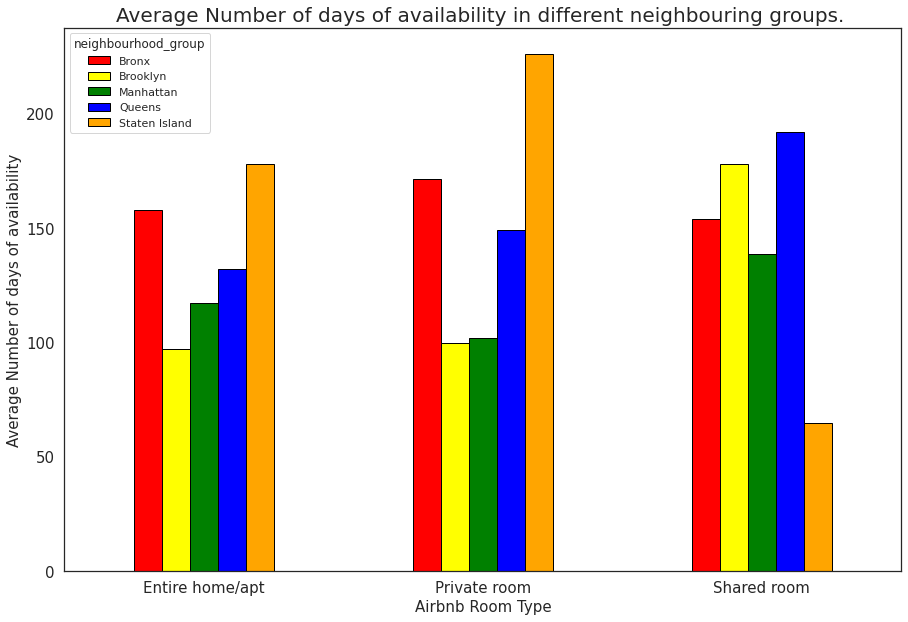

In [190]:
#plotting the graph
plt.rcParams['figure.figsize']=(15,10)
room_neighbourhood_availability.plot(kind='bar',color=['red', 'yellow', 'green', 'blue', 'orange'],edgecolor='black')
plt.title("Average Number of days of availability in different neighbouring groups. ",fontsize=20)
plt.xlabel("Airbnb Room Type",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Average Number of days of availability",fontsize=15)
plt.xticks(rotation=360)
plt.yticks(fontsize = 15)

###INFERENCE


#Analysis - 10 ➡ Listing availability throughout the year across different neighbourhood groups.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

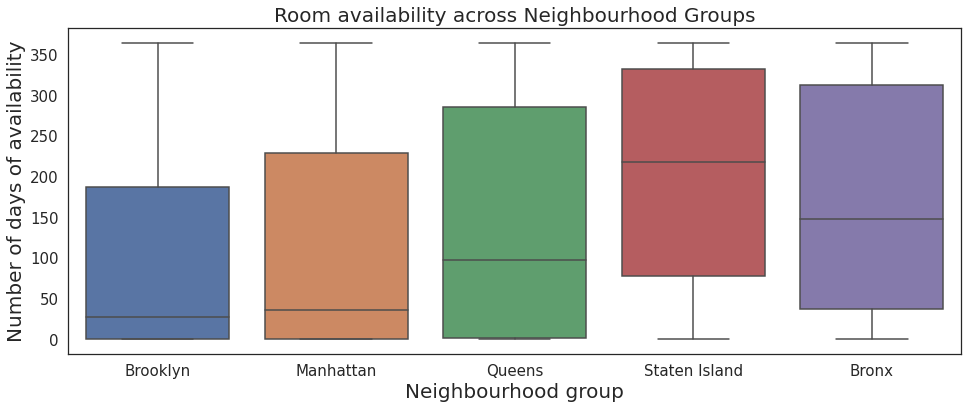

In [115]:
#plotting the graph
plt.figure(figsize=(16,6))
avail = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')
plt.title("Room availability across Neighbourhood Groups",size=20)
plt.xlabel("Neighbourhood group",fontsize=20)
plt.xticks(fontsize = 15)
plt.ylabel("Number of days of availability",fontsize=20)
plt.xticks(rotation=360)
plt.yticks(fontsize = 15)

###INFERENCE
We can see that all the neighbourhood have same peak and minimum value that is all the neighbourhoods have some properties which are available for 365 days and some are not available at all.

Manhattan & Brooklyn are mainly available for a fewer days in the year vs Queens, Staten Island and the Bronx.

Bronx & Manhattan have a similar median, however, Manhattans listing availability is more widely distributed.


#Analysis - 11 ➡ Relationship between neighbourhood groups and maximum host listings.

In [118]:
room_neighbourhood_host_listing=df.groupby(['neighbourhood_group','room_type'])['calculated_host_listings_count'].agg('max').unstack()
room_neighbourhood_host_listing

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,13,37,13
Brooklyn,232,103,34
Manhattan,327,327,28
Queens,15,103,18
Staten Island,7,8,7


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

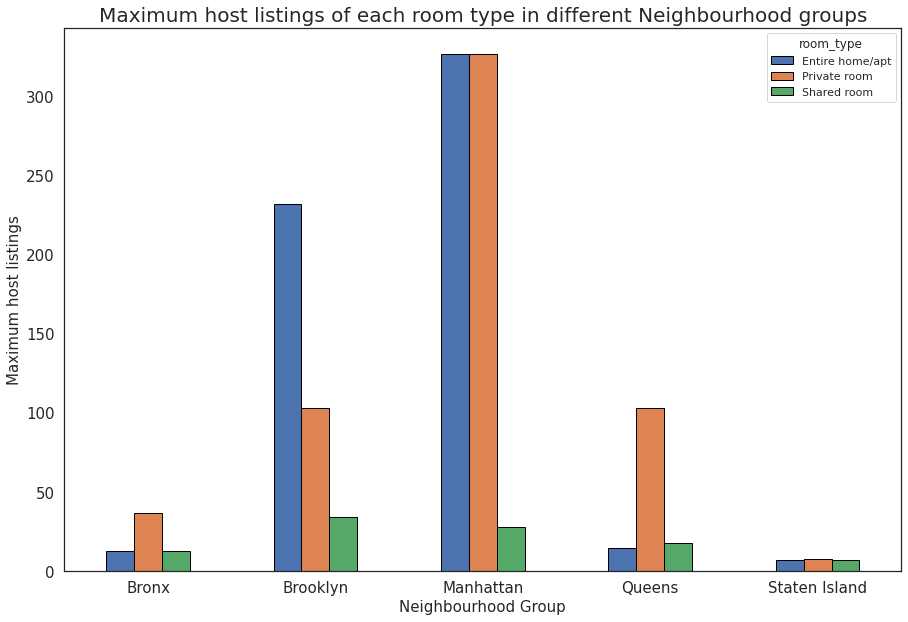

In [123]:
#plotting the graph
plt.rcParams['figure.figsize']=(15,10)
room_neighbourhood_host_listing.plot(kind='bar',edgecolor='black')
plt.title("Maximum host listings of each room type in different Neighbourhood groups",fontsize=20)
plt.xlabel("Neighbourhood Group",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Maximum host listings",fontsize=15)
plt.xticks(rotation=360)
plt.yticks(fontsize = 15)

###INFERENCE
Manhattan has the highest listing count of 327 in Entire home/apartment and Private room type.
Brooklyn has the second highest listing count in Entrire home/apartment room type.
Lowest listing count is in Staten Island and that too in all three room types.